In [5]:
import torch
import matplotlib.pyplot as plt
from SyntheticDataset import SyntheticDataset
import torchvision.transforms as transforms

# Step 1: Load Synthetic dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

dataset = SyntheticDataset(data_dir='E:\db_synthetic_1', transform=transform)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=64, shuffle=False)

# Choose an example image (you can change the index)
image_index = 1
image, _ = dataset[image_index]
batch_images = image.reshape(-1, image.shape[0], image.shape[1], image.shape[2])
batch_size = batch_images.shape[0]

In [6]:
# Split the batch into smaller chunks of size (32, 8, 8, 3)
patch_size = 16
num_patches = (batch_images.shape[2] // patch_size) * (batch_images.shape[3] // patch_size)
patches = batch_images.unfold(2, patch_size, patch_size).unfold(3, patch_size, patch_size)
patches = patches.contiguous().view(batch_size, 3, num_patches, patch_size, patch_size)
patches = patches.permute(0, 2, 1, 3, 4)
print(patches.shape)

torch.Size([1, 196, 3, 16, 16])


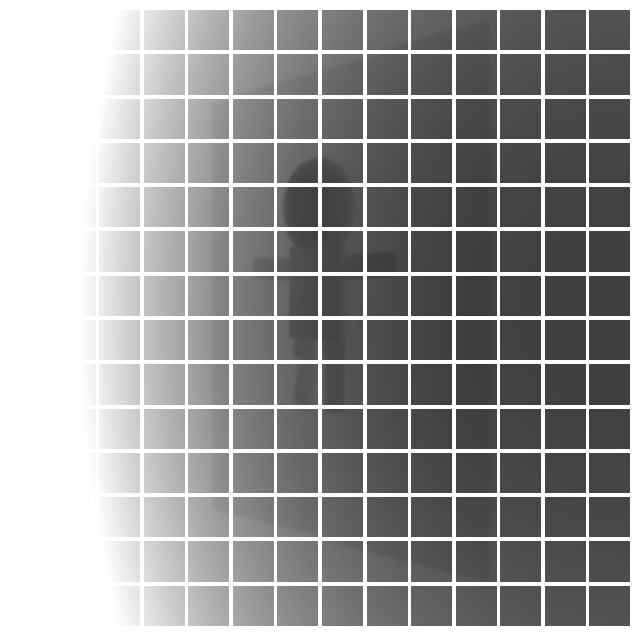

In [7]:
# Assuming the `patches` tensor has the shape (1, 64, 3, 8, 8)
num_patches = patches.shape[1]

# Determine the number of rows and columns for the subplot grid
num_rows = int(num_patches ** 0.5)
num_cols = num_rows

# Create a figure and a grid of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(8, 8))
axs = axs.ravel()  # Flatten the array of subplots

# Plot each patch
for i in range(num_patches):
    patch = patches[0, i].permute(1, 2, 0)  # Select the patch from the single batch, permute dimensions
    axs[i].imshow(patch)
    axs[i].axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Display the figure
plt.show()